# Thêm các thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file catada.txt

In [3]:
data = pd.read_csv('cadata.txt', header=None, delim_whitespace=True, encoding='latin1')

# Đặt tên cho các cột theo mô tả từ dataset

In [4]:
column_names = [
    'Median House Value', 'Median Income', 'Housing Median Age', 
    'Total Rooms', 'Total Bedrooms', 'Population', 'Households', 
    'Latitude', 'Longitude'
]
data.columns = column_names
data.head()

,Median House Value,Median Income,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Latitude,Longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25


# Kiểm tra các giá trị null

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Median House Value  20640 non-null  float64
 1   Median Income       20640 non-null  float64
 2   Housing Median Age  20640 non-null  float64
 3   Total Rooms         20640 non-null  float64
 4   Total Bedrooms      20640 non-null  float64
 5   Population          20640 non-null  float64
 6   Households          20640 non-null  float64
 7   Latitude            20640 non-null  float64
 8   Longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Dữ liệu đã cho không có giá trị null

# Chia dữ liệu thành tập train và test

In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(['Median House Value'], axis=1)
y = data['Median House Value']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
train_data = X_train.join(y_train)

In [9]:
train_data

,Median Income,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Latitude,Longitude,Median House Value
20496,4.4964,27.0,3536.0,646.0,1837.0,580.0,34.28,-118.70,238300.0
233,4.6563,45.0,2718.0,451.0,1106.0,454.0,37.79,-122.19,231800.0
8715,5.7850,25.0,5622.0,998.0,2537.0,1009.0,33.85,-118.37,395300.0
4872,1.8750,39.0,2004.0,633.0,3050.0,621.0,34.02,-118.27,127300.0
18728,2.6705,26.0,1435.0,234.0,544.0,232.0,40.55,-122.37,136700.0
...,...,...,...,...,...,...,...,...,...
19053,3.2937,33.0,1808.0,363.0,824.0,340.0,38.16,-121.69,96400.0
2010,2.6176,17.0,1276.0,242.0,927.0,238.0,36.72,-119.82,54100.0
16624,2.6205,27.0,2863.0,711.0,930.0,533.0,35.35,-120.84,221100.0
13012,4.3009,14.0,3713.0,637.0,1845.0,635.0,38.71,-121.25,143400.0


# Biểu đồ phân phối của các biến trong dữ liệu huấn luyện

array([[<Axes: title={'center': 'Median Income'}>,
        <Axes: title={'center': 'Housing Median Age'}>,
        <Axes: title={'center': 'Total Rooms'}>],
       [<Axes: title={'center': 'Total Bedrooms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Median House Value'}>]], dtype=object)

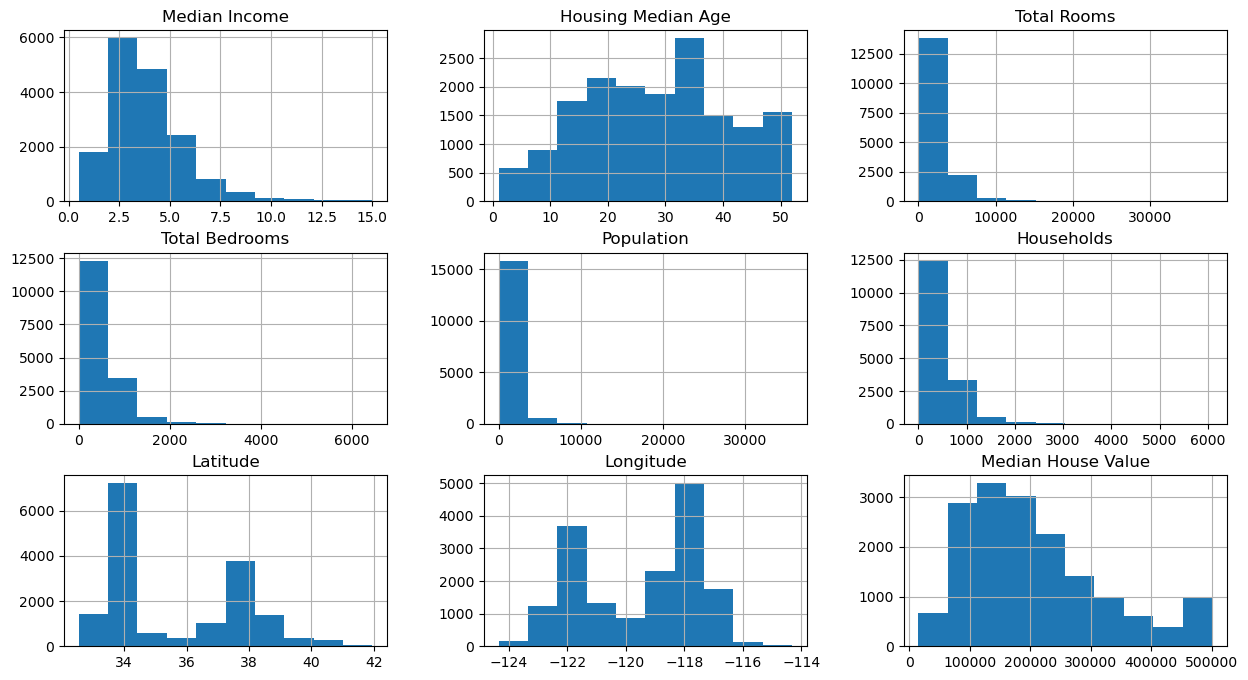

In [10]:
train_data.hist(figsize=(15, 8))

# Ma trận tương quan

<Axes: >

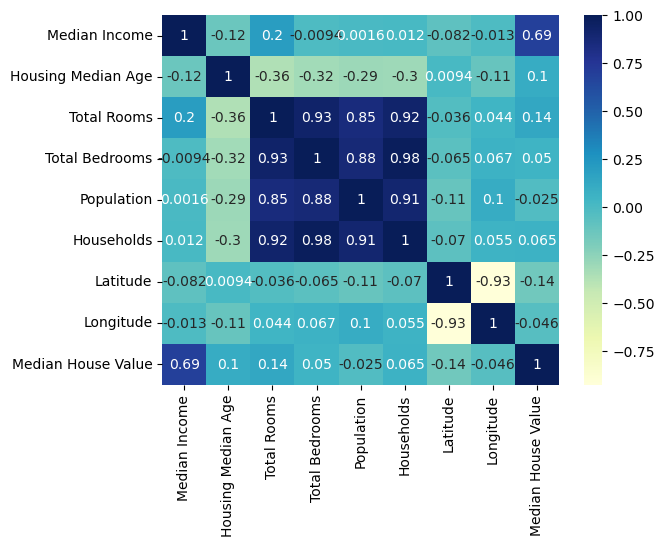

In [11]:
# plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Biểu đồ tương quan giá nhà với tọa độ

<Axes: xlabel='Latitude', ylabel='Longitude'>

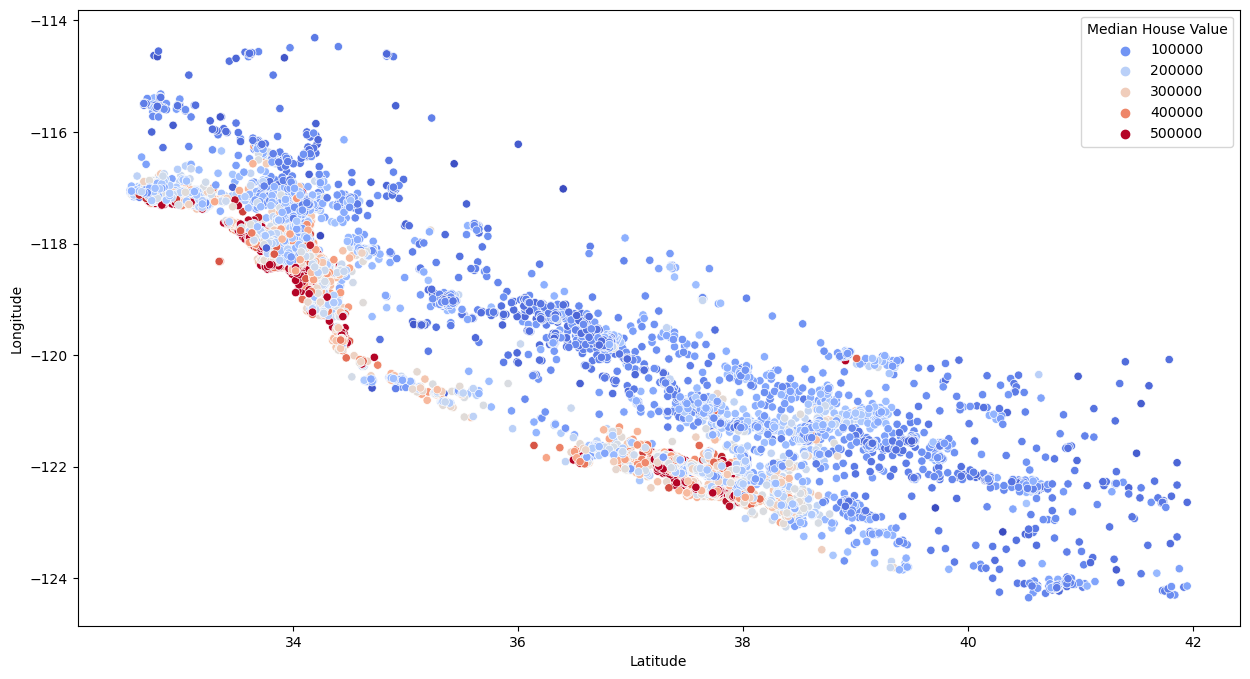

In [12]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Latitude', y='Longitude', data=train_data, hue='Median House Value', palette='coolwarm')

# Hồi quy bằng K-Nearest Neighbors (KNN)

In [16]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

# Đánh giá hiệu suất mô hình KNN

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
y_pred_knn = knn_regressor.predict(X_test)
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_rmse = sqrt(knn_mse)

print("K-Nearest Neighbors:")
print(f"MSE: {knn_mse:.2f}")
print(f"MAE: {knn_mae:.2f}")
print(f"RMSE: {knn_rmse:.2f}")

K-Nearest Neighbors:
MSE: 9828273492.15
MAE: 76686.61
RMSE: 99137.65


# Hồi quy bằng Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(max_depth=15)
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15)

# Đánh giá hiệu suất mô hình Decision Tree

In [20]:
decision_tree_y_pred = decision_tree_regressor.predict(X_test)
dt_mse = mean_squared_error(y_test, decision_tree_y_pred)
dt_mae = mean_absolute_error(y_test, decision_tree_y_pred)
dt_rmae = sqrt(dt_mse)

print("\nDecision Tree:")
print(f"MSE: {dt_mse:.2f}")
print(f"MAE: {dt_mae:.2f}")
print(f"RMAE: {dt_rmae:.2f}")


Decision Tree:
MSE: 4631629913.97
MAE: 42794.86
RMAE: 68056.08


# Hồi quy bằng rừng ngẫu nhiên 

In [22]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators=100)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

# Đánh giá hiệu suất mô hình rừng ngẫu nhiên

In [137]:
forest_y_pred = forest_regressor.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_mae = mean_absolute_error(y_test, forest_y_pred)
forest_rmae = sqrt(forest_mse)

print("Random forest:")
print(f"MSE: {forest_mse:.2f}")
print(f"MAE: {forest_mae:.2f}")
print(f"RMAE: {forest_rmae:.2f}")

Random forest:
MSE: 2533861188.01
MAE: 32063.71
RMAE: 50337.47


In [101]:
pd.DataFrame({'y' : y_test, 'y_pred' : forest_y_pred})

,y,y_pred
17355,158600.0,230162.798950
20438,401900.0,321641.105079
6770,469100.0,443950.645186
6656,155600.0,166891.776368
19881,58600.0,74981.437000
...,...,...
12086,267900.0,223101.377830
2826,200000.0,322685.568698
2257,66900.0,68147.192349
10836,264200.0,256809.924789


# Hồi quy bằng SVM

In [138]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='rbf', C=10000, gamma=0.001)

svr_regressor.fit(X_train, y_train)

SVR(C=10000, gamma=0.001)

# Đánh giá hiệu suất mô hình SVM (SVR)

In [139]:
svr_y_pred = svr_regressor.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_mae = mean_absolute_error(y_test, svr_y_pred)
svr_rmae = sqrt(svr_mse)

print("SVR:")
print(f"MSE: {svr_mse:.2f}")
print(f"MAE: {svr_mae:.2f}")
print(f"RMAE: {svr_rmae:.2f}")

SVR:
MSE: 13186466302.62
MAE: 84951.78
RMAE: 114832.34


In [106]:
pd.DataFrame({'y' : y_test, 'y_pred' : svr_y_pred})

,y,y_pred
17355,158600.0,269752.534148
20438,401900.0,401899.921289
6770,469100.0,428987.909875
6656,155600.0,155599.925993
19881,58600.0,58600.104823
...,...,...
12086,267900.0,282732.067533
2826,200000.0,144460.000768
2257,66900.0,233785.375719
10836,264200.0,232770.419757


# Hồi quy bằng Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression

l_regressor = LinearRegression()
l_regressor.fit(X_train, y_train)

LinearRegression()

# Đánh giá hiệu suất mô hình Linear Regression

In [108]:
lr_y_pred = svr_regressor.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_rmae = sqrt(lr_mse)

print("SVR:")
print(f"MSE: {lr_mse:.2f}")
print(f"MAE: {lr_mae:.2f}")
print(f"RMAE: {lr_rmae:.2f}")

SVR:
MSE: 6522792331.16
MAE: 52921.25
RMAE: 80763.81


# Chuẩn hóa dữ liệu

In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [112]:
X_test_scaler

array([[0.31112674, 0.41176471, 0.06556793, ..., 0.06085526, 0.24867163,
        0.39043825],
       [0.4630143 , 0.31372549, 0.05046035, ..., 0.03930921, 0.18278427,
        0.55378486],
       [0.47662791, 1.        , 0.06035404, ..., 0.05740132, 0.16684378,
        0.61752988],
       ...,
       [0.10668818, 0.35294118, 0.08245587, ..., 0.11644737, 0.45270988,
        0.44920319],
       [0.315106  , 0.62745098, 0.06770436, ..., 0.07023026, 0.12114772,
        0.63944223],
       [0.24867933, 0.70588235, 0.07563966, ..., 0.09802632, 0.15515409,
        0.62549801]])

In [111]:
X_train_scaler

array([[0.1516117 , 0.94117647, 0.0408973 , ..., 0.05740132, 0.19978746,
        0.46115538],
       [0.15014965, 0.80392157, 0.0133018 , ..., 0.01940789, 0.16684378,
        0.70219124],
       [0.08812982, 0.7254902 , 0.04799329, ..., 0.09161184, 0.1498406 ,
        0.61155378],
       ...,
       [0.19971449, 0.74509804, 0.04094817, ..., 0.05263158, 0.55579171,
        0.21713147],
       [0.20818334, 0.05882353, 0.16170711, ..., 0.22927632, 0.16578108,
        0.67430279],
       [0.22882443, 0.45098039, 0.06513556, ..., 0.08207237, 0.53347503,
        0.23306773]])

# Hồi quy bằng K-Nearest Neighbors (KNN) với dữ liệu đã được chuẩn hóa

In [113]:
knn_regressor_scaler = KNeighborsRegressor(n_neighbors=20)
knn_regressor_scaler.fit(X_train_scaler, y_train)

KNeighborsRegressor(n_neighbors=20)

# Đánh giá hiệu suất mô hình KNN với dữ liệu chuẩn hóa

In [114]:
y_pred_knn_scaler = knn_regressor_scaler.predict(X_test_scaler)
knn_mse_scaler = mean_squared_error(y_test, y_pred_knn_scaler)
knn_mae_scaler = mean_absolute_error(y_test, y_pred_knn_scaler)
knn_rmae_scaler = sqrt(knn_mse_scaler)

print("K-Nearest Neighbors with scaled data:")
print(f"MSE: {knn_mse_scaler:.2f}")
print(f"MAE: {knn_mae_scaler:.2f}")
print(f"RMAE: {knn_rmae_scaler:.2f}")

K-Nearest Neighbors with scaled data:
MSE: 4081355732.93
MAE: 43088.18
RMAE: 63885.49


# Hồi quy bằng Decision Tree với dữ liệu chuẩn hóa

In [115]:
decision_tree_regressor_scaler = DecisionTreeRegressor(max_depth=5)
decision_tree_regressor_scaler.fit(X_train_scaler, y_train)

DecisionTreeRegressor(max_depth=5)

# Đánh giá hiệu suất mô hình Decision Tree với dữ liệu chuẩn hóa

In [117]:
decision_tree_y_pred_scaler = decision_tree_regressor_scaler.predict(X_test_scaler)
dt_mse_scaler = mean_squared_error(y_test, decision_tree_y_pred_scaler)
dt_mae_scaler = mean_absolute_error(y_test, decision_tree_y_pred_scaler)
dt_rmae_scaler = sqrt(dt_mse_scaler)

print("\nDecision Tree with scaled data:")
print(f"MSE: {dt_mse_scaler:.2f}")
print(f"MAE: {dt_mae_scaler:.2f}")
print(f"RMAE: {dt_rmae_scaler:.2f}")


Decision Tree with scaled data:
MSE: 5601614210.53
MAE: 53395.75
RMAE: 74843.93


# Hồi quy bằng rừng ngẫu nhiên dữ liệu chuẩn hóa

In [118]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor_scaler = RandomForestRegressor(max_depth=6, n_estimators=1000)
forest_regressor_scaler.fit(X_train_scaler, y_train)

RandomForestRegressor(max_depth=6, n_estimators=1000)

# Đánh giá hiệu suất mô hình rừng ngẫu nhiên dữ liệu chuẩn hóa

In [119]:
forest_y_pred_scaler = forest_regressor_scaler.predict(X_test_scaler)
forest_mse_scaler = mean_squared_error(y_test, forest_y_pred_scaler)
forest_mae_scaler = mean_absolute_error(y_test, forest_y_pred_scaler)
forest_rmae_scaler = sqrt(forest_mse_scaler)

print("Random forest:")
print(f"MSE: {forest_mse_scaler:.2f}")
print(f"MAE: {forest_mae_scaler:.2f}")
print(f"RMAE: {forest_rmae_scaler:.2f}")

Random forest:
MSE: 4576388524.38
MAE: 47456.61
RMAE: 67649.01


# Hồi quy bằng SVM dữ liệu chuẩn hóa

In [120]:
from sklearn.svm import SVR

svr_regressor_scaler = SVR(kernel='rbf', C=100000, gamma=0.0001)

svr_regressor_scaler.fit(X_train_scaler, y_train)

SVR(C=100000, gamma=0.0001)

# Đánh giá hiệu suất mô hình SVM (SVR) dữ liệu chuẩn hóa

In [133]:
svr_y_pred_scaler = svr_regressor_scaler.predict(X_train_scaler)
svr_mse_scaler = mean_squared_error(y_train, svr_y_pred_scaler)
svr_mae_scaler = mean_absolute_error(y_train, svr_y_pred_scaler)
svr_rmae_scaler = sqrt(svr_mse_scaler)

print("SVR:")
print(f"MSE: {svr_mse_scaler:.2f}")
print(f"MAE: {svr_mae_scaler:.2f}")
print(f"RMAE: {svr_rmae_scaler:.2f}")

SVR:
MSE: 13505766178.46
MAE: 86826.12
RMAE: 116214.31


# Hồi quy bằng Linear Regression dữ liệu chuẩn hóa

In [131]:
from sklearn.linear_model import LinearRegression

l_regressor_scaler = LinearRegression()
l_regressor_scaler.fit(X_train_scaler, y_train)

LinearRegression()

# Đánh giá hiệu suất mô hình Linear Regression dữ liệu chuẩn hóa

In [132]:
lr_y_pred_scaler = svr_regressor_scaler.predict(X_test_scaler)
lr_mse_scaler = mean_squared_error(y_test, lr_y_pred_scaler)
lr_mae_scaler = mean_absolute_error(y_test, lr_y_pred_scaler)
lr_rmae_scaler = sqrt(lr_mse_scaler)

print("SVR:")
print(f"MSE: {lr_mse_scaler:.2f}")
print(f"MAE: {lr_mae_scaler:.2f}")
print(f"RMAE: {lr_rmae_scaler:.2f}")

SVR:
MSE: 13113371531.59
MAE: 84548.18
RMAE: 114513.63


# Cây quyết định

In [21]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=5)

dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [24]:
from sklearn.metrics import mean_squared_error
train_predictions = dt_model.predict(X_train)
test_predictions = dt_model.predict(X_test)

# Đánh giá mô hình sử dụng Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 5271854251.066907
Test MSE: 5482914566.1506195


In [68]:
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

forest_model_pred = forest_model.predict(X_test)


forest_model_mae = mean_absolute_error(y_test, forest_model_pred)
forest_model_mse = mean_squared_error(y_test, forest_model_pred)
forest_model_r2 = r2_score(y_test, forest_model_pred)
print("MAE : ", forest_model_mae)
print("MSE : ", forest_model_mse)
print("R2 : ", forest_model_r2)

NameError: name 'forest_model' is not defined

In [32]:
pd.DataFrame({'y' : y_test, 'y_pred' : forest_model_pred})

,y,y_pred
516,471600.0,436242.554229
9424,238700.0,363762.538650
3613,179200.0,205009.617638
17516,421000.0,323032.519998
15574,221000.0,242985.149218
...,...,...
19201,129900.0,158517.170611
20331,311900.0,277134.383660
5714,285000.0,318050.045087
15993,420300.0,306541.782736


In [51]:
X_train_scaler

array([[0.28160991, 0.07843137, 0.01686251, ..., 0.02795593, 0.11902232,
        0.64664665],
       [0.10151584, 0.80392157, 0.05717483, ..., 0.09998356, 0.15834219,
        0.61161161],
       [0.18103888, 0.47058824, 0.02591688, ..., 0.04226279, 0.1381509 ,
        0.63963964],
       ...,
       [0.22931408, 0.50980392, 0.02342439, ..., 0.03338267, 0.1424017 ,
        0.62262262],
       [0.28871326, 0.05882353, 0.08360039, ..., 0.10376583, 0.10839532,
        0.66366366],
       [0.2316106 , 0.19607843, 0.13634976, ..., 0.16987338, 0.18065887,
        0.58458458]])